## 一、重复值处理

In [1]:
import pandas as pd
data = pd.DataFrame([[1,2,3], [1,2,3],[7,8,9]], columns=['c1', 'c2', 'c3'])
data.head()

,c1,c2,c3
0,1,2,3
1,1,2,3
2,7,8,9


In [4]:
# 用duplicated()函数来查询重复的内容
data[data.duplicated()]

,c1,c2,c3
1,1,2,3


In [5]:
# 统计重复行的数量
data.duplicated().sum()

1

In [10]:
# 用drop_duplicates()函数删除重复行
data = data.drop_duplicates() # drop_duplicates()函数并不改变原表格结构，所以需要进行重新赋值，或者在其中设置inplace参数为True
data.head()

,c1,c2,c3
0,1,2,3
2,7,8,9


In [11]:
# 若要按列进行去重，例如，c1列出现重复的内容，就将重复内容所在的一整行删除
data = data.drop_duplicates('c1')

## 二、缺失值处理

In [13]:
import pandas as pd
import numpy as np
data = pd.DataFrame([[1, np.nan, 3], [np.nan, 2, np.nan], [1, np.nan, 0]], columns=['c1', 'c2', 'c3'])
data.head()

,c1,c2,c3
0,1.0,NaN,3.0
1,NaN,2.0,NaN
2,1.0,NaN,0.0


In [14]:
# 用isnull()函数或isna()函数（两者作用类似）来查看空值
data.isnull() 

,c1,c2,c3
0,False,True,False
1,True,False,True
2,False,True,False


In [16]:
# 对单列查看空值
data['c1'].isnull()

0    False
1     True
2    False
Name: c1, dtype: bool

In [18]:
# 如果数据量较大，可以通过如下代码筛选出某列中内容为空值的行
data[data['c2'].isnull()]

,c1,c2,c3
0,1.0,NaN,3.0
2,1.0,NaN,0.0


In [20]:
# 用dropna()函数可以删除空值
a = data.dropna()
a.head()

,c1,c2,c3


In [21]:
# 可以设置thresh参数，例如将其设置为n，表示如果一行中的非空值少于n个则删除该行
a = data.dropna(thresh=2)
a.head()

,c1,c2,c3
0,1.0,NaN,3.0
2,1.0,NaN,0.0


In [22]:
# 用fillna()函数可以填补空值。这里采用的是均值填补法，用每列的均值对该列的空值进行替换，也可以把其中的data.mean()换成data.median()，变为中位数填补
b = data.fillna(data.mean())
b.head()

,c1,c2,c3
0,1.0,2.0,3.0
1,1.0,2.0,1.5
2,1.0,2.0,0.0


In [23]:
# 空值填补还可以采取用空值上方或下方的值替换空值的方式
c = data.fillna(method='pad') # method='pad'表示用空值上方的值来替换空值，如果上方的值不存在或也为空值，则不替换
c.head()

,c1,c2,c3
0,1.0,NaN,3.0
1,1.0,2.0,3.0
2,1.0,2.0,0.0


还可以设置method='backfill'或method='bfill'，表示用空值下方的值来替换空值，如果下方的值不存在或也为空值，则不替换

## 三、异常值处理

In [24]:
data = pd.DataFrame({'c1': [3, 10, 5, 7, 1, 9, 69], 'c2': [15, 16, 14,100, 19, 11, 8], 'c3': [20, 15, 18, 21, 120, 27, 29]}, columns=['c1',
'c2', 'c3'])
data.head()

,c1,c2,c3
0,3,15,20
1,10,16,15
2,5,14,18
3,7,100,21
4,1,19,120


可以看到，第1列的数字69、第2列的数字100、第3列的数字120为比较明显的异常值，那么该如何利用Python检测异常值呢？
### 1、利用箱体图观察
箱体图是一种用于显示一组数据分散情况资料的统计图，可以通过设定标准，将大于或小于箱体图上下界的数值识别为异常值。如下图所示，将数据的下四分位数记为Q1，即样本中仅有25%的数据小于Q1；将数据的上四分位数记为Q3，即样本中仅有25%的数据大于Q3；将上四分位数和下四分位数的差值记为IQR，即IQR＝Q3-Q1；令箱体图上界为Q3＋1.5×IQR，下界为Q1-1.5×IQR。
![箱体图示](image/箱体图示.png)

<AxesSubplot:>

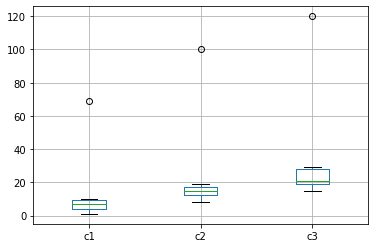

In [25]:
data.boxplot() # 用DataFrame的boxplot()函数绘制箱体图

### 2、利用标准差检测
当数据服从标准正态分布时，99%的数值与均值的距离应该在3个标准差之内，95%的数值与均值的距离应该在2个标准差之内，如下图所示。因为3个标准差过于严格，此处将阈值设定为2个标准差，即认为当数值与均值的距离超出2个标准差，则可以认为它是异常值。
![正态分布图](image/正态分布图.png)

In [29]:
a = pd.DataFrame() # 建立一个空DataFrame
for i in data.columns: # 通过for循环依次对数据的每列进行操作 
    z = (data[i]-data[i].mean())/data[i].std() # 用mean()函数（获取均值）和std()函数（获取标准差）将每列数据进行Z-score标准化
    a[i] = abs(z) > 2 # 进行逻辑判断，如果Z-score标准化后的数值大于标准正态分布的标准差1的2倍，那么该数值为异常值，返回布尔值True，否则返回布尔值False
    
a.head(10)

,c1,c2,c3
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,True
5,False,False,False
6,True,False,False


检测到异常值后，如果异常值较少或影响不大，也可以不处理。如果需要处理，可以采用如下几种常见的方式：
* 删除含有异常值的记录；
* 将异常值视为缺失值
* 利用数据分箱方法进行处理。